In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

a dot   b is -17
a cross b is [-4  1 17]


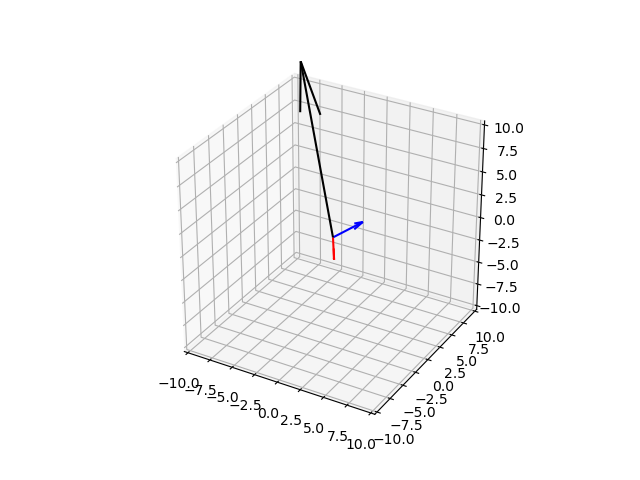

In [66]:
# 4-2, 4-3
# cross and dot
plt.clf()
ax = plt.axes(projection="3d")
ax.set_box_aspect(aspect=(1, 1, 1))
a = np.array([3, -5, 1])
b = np.array([1, 4, 0])
crossed = np.cross(a, b)

print("a dot   b is", np.dot(a, b))
print("a cross b is", crossed)

size = 10
ax.set_xlim3d(-size, size)
ax.set_ylim3d(-size, size)
ax.set_zlim3d(-size, size)

ax.quiver(0, 0, 0, *a, color="r")
ax.quiver(0, 0, 0, *b, color="b")
ax.quiver(0, 0, 0, *crossed, color="black")

plt.show()

a + b = [-1  5]
a - b = [ 3 -1]
a * b = 4


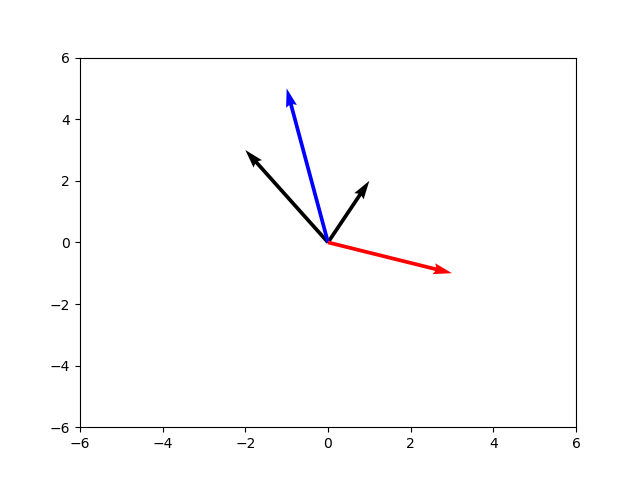

In [67]:
# 5-1
# summation of 2 2-dimension arrays
plt.clf()
a = np.array([1, 2])
b = np.array([-2, 3])
summ = a + b
sub = a - b
mul = np.array(np.matmul(a, b))

print(f"a + b = {summ}")
print(f"a - b = {sub}")
print(f"a * b = {mul}")

plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.quiver(0, 0, *a, color="black", angles="xy", scale_units="xy", scale=1)
plt.quiver(0, 0, *b, color="black", angles="xy", scale_units="xy", scale=1)

plt.quiver(0, 0, *summ, color="blue", angles="xy", scale_units="xy", scale=1)
plt.quiver(0, 0, *sub, color="red", angles="xy", scale_units="xy", scale=1)
plt.show()

In [113]:
# 5-1
# summation of many n-dimension arrays
vectors = np.array([[[1, 2, 3], [2, 4, 6]],
                    [[-2, 5, -3], [2, 7, 4]],
                    [[-1, -7, 4], [4, 5, 8]] ])
summ = vectors[0]
for v in vectors[1:]:
    summ += v
print(f"sum = \n{summ}")

sum = 
[[-2  0  4]
 [ 8 16 18]]


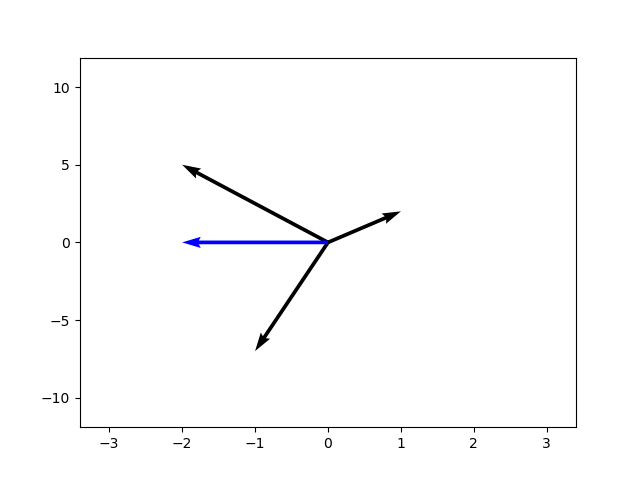

In [64]:
# 5-1
# summation of 2-dimension arrays, then plot it out
plt.clf()
vectors = np.array([[1, 2],
                    [-2, 5],
                    [-1, -7]])

limit_x = np.max(np.abs(vectors), axis=0)[0] * 1.7
limit_y = np.max(np.abs(vectors), axis=0)[1] * 1.7
plt.xlim(-limit_x, limit_x)
plt.ylim(-limit_y, limit_y)

for v in vectors:
    plt.quiver(0, 0, v[0], v[1], color="black", angles="xy", scale_units="xy", scale=1)

summation = vectors[0]
for i in vectors[1:]: summation += i
plt.quiver(0, 0, summation[0], summation[1], color="blue",
           angles="xy", scale_units="xy", scale=1)

plt.show()

In [55]:
from sympy import Matrix, symbols, diff, sin, cos, pprint, init_printing, lambdify
from sympy.solvers.solveset import linsolve
from sympy.plotting import plot3d_parametric_line, plot3d
from sympy.vector import CoordSys3D, gradient, divergence, Del, curl

In [54]:
# 5-3, 5-5
# solve linear algebra, includes inhomogeneous(非齊次) solve
# AX = B, X = (x1, x2, ..., xn)^t, B = (b1, b2, ..., bm)^t
x1, x2, x3, x4 = symbols("x1, x2, x3, x4")
AnB = Matrix([[1, -2,  3, -4, -8],
              [2,  1,  0,  2, 11],
              [1,  1, -1,  2,  7],
              [2,  1, -3,  1,  0]])  # [A|B]
linsolve(AnB, (x1, x2, x3, x4))

{(1, 5, 3, 2)}

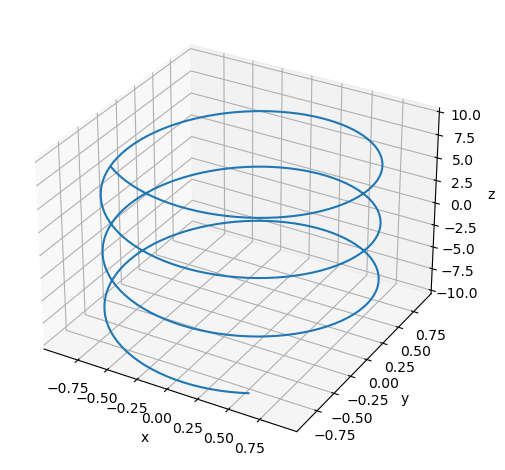

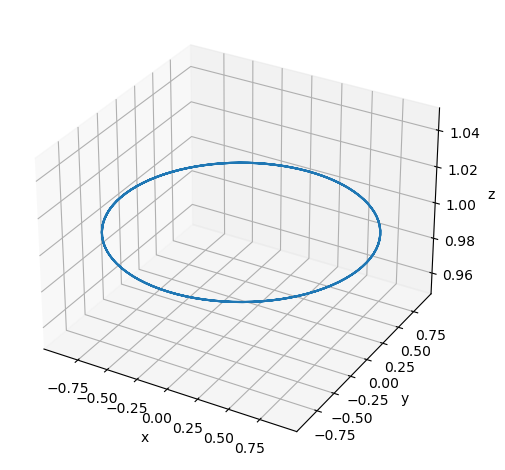

In [56]:
# 6-1
# v(t) = v1(t)i + v2(t)j + v3(t)k
# i, j, k are vectors, (1, 0, 0), (0, 1, 0), (0, 0, 1)
t = symbols("t")
v1_t = sin(t)
v2_t = cos(t)
v3_t = t
v_t = 0
alpha = [v1_t, v2_t, v3_t]
plot3d_parametric_line(*alpha)
diffed = [diff(v1_t, t), diff(v2_t, t), diff(v3_t, t)]
plot3d_parametric_line(*diffed)

     2        2
2⋅x_R  + 3⋅y_R 
<class 'sympy.vector.scalar.BaseScalar'> <class 'sympy.vector.vector.BaseVector'>


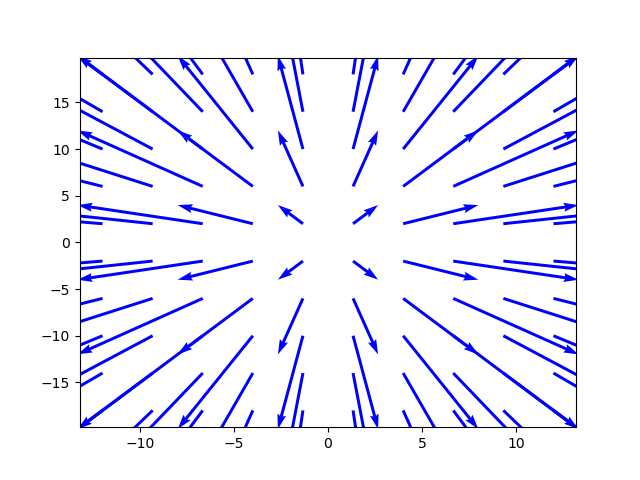

(4⋅x_R) i_R + (6⋅y_R) j_R


In [70]:
# 什麼是梯度, Del() 的使用
plt.clf()
R = CoordSys3D("R")
delop = Del()  # del operator, 相當於∇

coeff_xyz = [2, 3, 4]  # x, y, z
R.z = coeff_xyz[0] * R.x ** 2 + \
      coeff_xyz[1] * R.y ** 2
g = delop.gradient(R.z, doit=True)

pprint(R.z)

xrange = np.linspace(-3,3,10)
yrange = np.linspace(-3,3,10)
X, Y = np.meshgrid(xrange, yrange)
U, V = X, Y


for i in range(len(xrange)):
    for j in range(len(yrange)):
        tmp = g.subs({R.x: X[i, j], R.y: Y[i, j]})
        tmp = tmp.to_matrix(R)[:2]

        U[i, j], V[i, j] = tmp

plt.quiver(X, Y, U, V, color="blue",
           angles="xy", scale_units="xy", scale=1)

plt.show()
pprint(g)

In [45]:
# 梯度, 直接用gradient()
R = CoordSys3D("R")
coeff_xyz = [2, 3, 4]  # x, y, z
f = coeff_xyz[0] * R.x ** 2 + \
    coeff_xyz[1] * R.y ** 2
g = gradient(f)
pprint(g)

(4⋅x_R) i_R + (6⋅y_R) j_R


In [2]:
# 方向導數
R = CoordSys3D("R")
coeff_xyz = [2, 3, 4]  # x, y, z
coeff_ijk = [1, 2, -1]  # i, j, k
f = coeff_xyz[0] * R.x ** 2 + \
    coeff_xyz[1] * R.y ** 2 + \
    coeff_xyz[2] * R.z ** 2
g = gradient(f)
del_f = g.subs([(R.x, 1), (R.y, 2), (R.z, 3)])
a = coeff_ijk[0] * R.i + \
    coeff_ijk[1] * R.j + \
    coeff_ijk[2] * R.k
init_printing()

print("f(x, y, z) = ")
pprint(f)
print("\na = ")
pprint(a)
print("\n∇f = ")
pprint(g)
pprint(del_f)
print()

result = (del_f.dot(a)) / (sum([f ** 2 for f in coeff_ijk]))**0.5

print("answer is (1 / ||a||) ∇f ⋅ a")
print("result is: ", end="")
pprint(result)

f(x, y, z) = 
     2        2        2
2⋅R_x  + 3⋅R_y  + 4⋅R_z 

a = 
R_i + (2) R_j + (-1) R_k

∇f = 
(4⋅R_x) R_i + (6⋅R_y) R_j + (8⋅R_z) R_k
(4) R_i + (12) R_j + (24) R_k

answer is (1 / ||a||) ∇f ⋅ a
result is: 1.63299316185545


In [9]:
# 什麼是散度
# 散度是∇ ⋅ f
R = CoordSys3D("R")
f = 1  * R.x**1 * R.y**1 * R.z**1 * R.i + \
   -4  * R.x**2 * R.y**1 * R.z**2 * R.j + \
    2  * R.x**1 * R.y**1 * R.z**2 * R.k
d = delop.dot(f, doit=True)
pprint(d)

       2    2                          
- 4⋅x_R ⋅z_R  + 4⋅x_R⋅y_R⋅z_R + y_R⋅z_R


In [7]:
# 散度, 直接用divergence()
d = divergence(f)
pprint(d)

       2    2                          
- 4⋅x_R ⋅z_R  + 4⋅x_R⋅y_R⋅z_R + y_R⋅z_R


In [11]:
# 什麼是旋度
# 旋度是∇ × f
R = CoordSys3D("R")
f =  1 * R.x**1 * R.y**1 * R.z**1 * R.i + \
    -4 * R.x**2 * R.y**1 * R.z**2 * R.j + \
     2 * R.x**1 * R.y**1 * R.z**2 * R.k
c = delop.cross(f, doit=True)
pprint(c)

⎛     2      ⎞     
⎝- x_R  - y_R⎠ k_R 


In [14]:
# 散度, 直接用curl()
c = curl(f)
pprint(c)

⎛     2      ⎞     
⎝- x_R  - y_R⎠ k_R 
